# Data Cleaning Notebook

## Introduction

In this notebook, we will focus on the crucial task of data cleaning, which is an essential step in preparing our dataset for further analysis and preprocessing. The primary objectives of this notebook are to:

1. **Handle Missing Values:** We will identify and manage any missing values in our dataset, ensuring that they are addressed appropriately to maintain data integrity.
  
2. **Correct Typographical Errors:** We will review the dataset for any typos or inconsistencies in names and other categorical data, correcting them to ensure uniformity.

3. **Eliminate Redundant or Duplicate Information:** We will identify and remove any duplicate entries or redundant information that may skew our analysis, providing a cleaner dataset for future processing.

By the end of this cleaning process, our dataset will be refined and ready for preprocessing, allowing us to derive meaningful insights and build robust models.


In [36]:
import pandas as pd
import numpy as np

%run ../telco_customer_churn/utils/pandas_explorer.py
%run ../telco_customer_churn/utils/pandas_missing_handler.py


## Importation and first visualization:

In [37]:
path = ('../telco_customer_churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Looking for missing values:

In [40]:
df.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
customerID,0,0,0,0,0,0,0,0,0,0,0
gender,0,0,0,0,0,0,0,0,0,0,0
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,0,0,0,0,0,0,0,0,0,0,0
Dependents,0,0,0,0,0,0,0,0,0,0,0
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,0,0,0,0,0,0,0,0,0,0,0
MultipleLines,0,0,0,0,0,0,0,0,0,0,0
InternetService,0,0,0,0,0,0,0,0,0,0,0
OnlineSecurity,0,0,0,0,0,0,0,0,0,0,0


## Replacing the empty string values in "TotalCharges" with NaN:

In [41]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
customerID,0,0,0,0,0,0,0,0,0,0,0
gender,0,0,0,0,0,0,0,0,0,0,0
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,0,0,0,0,0,0,0,0,0,0,0
Dependents,0,0,0,0,0,0,0,0,0,0,0
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,0,0,0,0,0,0,0,0,0,0,0
MultipleLines,0,0,0,0,0,0,0,0,0,0,0
InternetService,0,0,0,0,0,0,0,0,0,0,0
OnlineSecurity,0,0,0,0,0,0,0,0,0,0,0


## Changing the "Object" type of TotalCharges to float

In [42]:
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cleaning missing values



In [43]:
print(df.isna().sum())
print(df.shape)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
(7043, 21)


- The "TotalCharges" column has 11 missing values over 7043 records

In [44]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- The fact that there are missing values in the "TotalCharges" column is related to the fact that all of these customers have a tenure of 0 months. This indicates that these are very new customers and have not accumulated any total charges because they haven't been subscribed long enough to generate a charge.

- Looking at other details, such as payment methods, subscribed services (phone, internet, etc.), and the fact that all of them have a two-year contract, it is reasonable to assume that the missing values in "TotalCharges" are not inconsistencies, but rather reflect the lack of time to generate charges. 
- Because these customers haven't been with the company long enough to provide meaningful data, their information will be removed from the analysis to prevent introducing bias.

## Removing missing values in TotalCharges:

In [45]:
df = df.dropna()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

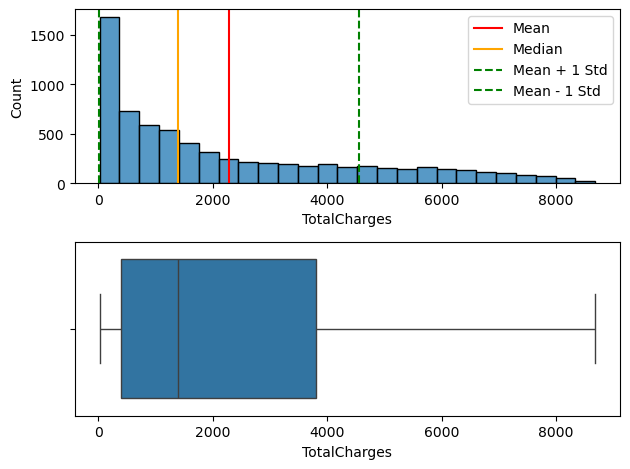

In [46]:
df.explorer.numerical_dist('TotalCharges')

## Looking for duplicate values:

In [47]:
print(f'- There are: {df["customerID"].duplicated().sum()} in the dataset.')

- There are: 0 in the dataset.


## Setting the customerID column as the index to temporarily exclude it from data transformations.

In [48]:
df.set_index('customerID', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Normalizing the columns name to Pascal-case

In [49]:
df = df.rename(columns= {
    'gender':'Gender',
    'tenure':'Tenure'
})

## Cleaning the "MultipleLines" column:

In [50]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

- It contains some "No phone service" values, which are redundant because if the customer doesn't have phone service, it can be inferred that they aren't using multiple lines. Therefore, it is necessary to replace "No phone service" with "No".

In [51]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df['MultipleLines'].value_counts()

MultipleLines
No     4065
Yes    2967
Name: count, dtype: int64

## Cleaning columns with "No internet service"
- The columns "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV" and "StreamingMovies" contain some "No internet service" values, which are redundant because if the customer doesn't have internet service, it can be inferred that they don't have any of the services mentioned above. Therefore, it is necessary to replace "No internet service" with "No."

In [52]:
df.iloc[:,8:14] = df.iloc[:,8:14].replace('No internet service','No')
df.iloc[:,8:14].value_counts()

OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies
No              No            No                No           No           No                 2213
Yes             Yes           Yes               Yes          Yes          Yes                 284
No              No            No                No           Yes          Yes                 218
                Yes           No                No           No           No                  209
                              Yes               No           Yes          Yes                 196
                                                                                             ... 
Yes             No            Yes               No           No           Yes                  27
                              No                Yes          Yes          No                   25
                              Yes               Yes          Yes          No                   24
                            

In [53]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Saving the Cleaned Dataset in a CSV File:

In [55]:
df.to_csv('../telco_customer_churn/data/cleaned_dataset.csv')

## Notebook Conclusions

After conducting a thorough cleaning of the dataset, we have addressed various issues that could affect subsequent analysis. Below are the key conclusions:

- **Missing Values:** Missing values in the "TotalCharges" column have been identified and addressed, ensuring they do not negatively impact the analysis results.
  
- **Typos and Names:** Typos have been corrected, and column names have been standardized, improving the clarity and consistency of the dataset.
  
- **Duplicate and Redundant Data:** Redundant categories have been simplified, facilitating a more accurate interpretation of the data.

- **Preparation for Preprocessing:** The dataset is now clean and organized, ready for the preprocessing and analysis stages, which will allow for more reliable and meaningful results in future models.

In summary, the actions taken have contributed to the integrity and quality of the data, laying a solid foundation for subsequent analysis.

